# Similarity of Positions in Embeddings

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
from embedding_helpers import load_embeddings
%matplotlib inline

## Data In

In [2]:
# Get the Glove and word2vec embeddings
glove = load_embeddings('data/glove.6B.100d.txt')
word2vec = KeyedVectors.load_word2vec_format('data/word2vec-google-news-300/word2vec-google-news-300.gz', limit=600000, binary=True)

0
100000
200000
300000


## Analysis

In [3]:
# Get our two endpoints for our hispanic-american axis in both embeddings
mexican_vector_glove = np.array(glove[glove.index == 'mexican'])
american_vector_glove = np.array(glove[glove.index == 'american'])

mexican_vector_word2vec = word2vec.get_vector('mexican')
american_vector_word2vec = word2vec.get_vector('american')

In [4]:
# Get directions in both embeddings
direction_glove = american_vector_glove - mexican_vector_glove
direction_word2vec = american_vector_word2vec - mexican_vector_word2vec

In [5]:
# Profession words to check
professions_glove = ['businessman','manager','legislator','maid','waiter','waitress','janitor'
                     ,'doorman','custodian','gardener','landscaper','stonemason'
                     ,'governor','doctor','nurse','attorney','lawyer','dentist','astronaut'
                     ,'plumber','barber','hairdresser','cashier','dishwasher','nanny','manicurist'
                     ,'bartender','carpenter','programmer','ceo','vp','executive','accountant']

# word2vec has capitalized letters, so list has to be slightly modified
professions_word2vec = ['businessman','manager','legislator','maid','waiter','waitress','janitor'
                        ,'doorman','custodian','gardener','landscaper','stonemason'
                        ,'governor','doctor','nurse','attorney','lawyer','dentist','astronaut'
                        ,'plumber','barber','hairdresser','cashier','dishwasher','nanny','manicurist'
                        ,'bartender','carpenter','programmer','CEO','VP','executive','accountant']

In [6]:
# Let's calculate the positions of each profession word on the hispanic-american axis
positions_on_axis_glove = list()
for profession in professions_glove:
    
    position = np.sum(np.array(glove[glove.index == profession]) * direction_glove)/np.linalg.norm(direction_glove)**2
    positions_on_axis_glove.append(position)

positions_on_axis_word2vec = list()
for profession in professions_word2vec:
    
    position = np.sum(word2vec.get_vector(profession) * direction_word2vec)/np.linalg.norm(direction_word2vec)**2
    positions_on_axis_word2vec.append(position)

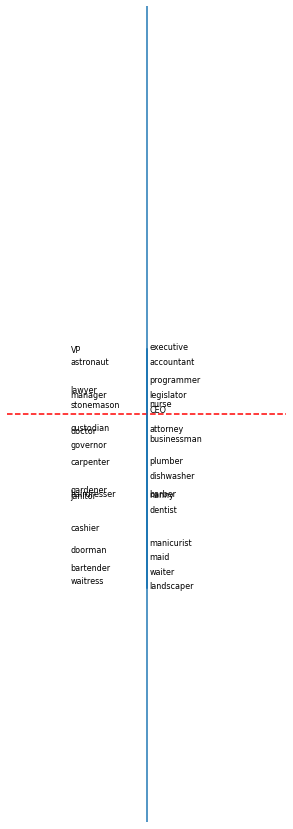

In [13]:
# Let's plot it
fig, ax = plt.subplots(figsize=(5,15))

zeros_for_1d = np.zeros_like(positions_on_axis_word2vec)
ax.plot(zeros_for_1d, positions_on_axis_word2vec)
ax.axhline(0, linestyle='--', color='red')
ax.set_ylim(-0.5,0.5)
ax.axvline(0)

# Annotate in order
sorting_indices = np.argsort(np.array(positions_on_axis_word2vec))

for i, ix in enumerate(sorting_indices):
    txt = professions_word2vec[ix]
    if txt == 'mexican':
        ax.annotate(txt, (-0.0075, positions_on_axis_word2vec[ix]-0.02))
    elif txt == 'american':
        ax.annotate(txt, (-0.0075, positions_on_axis_word2vec[ix]+0.02))
    elif i % 2 == 0:
        ax.annotate(txt, (0.001, positions_on_axis_word2vec[ix]), size=8)
    else:
        ax.annotate(txt, (-0.03, positions_on_axis_word2vec[ix]), size=8)
        
_ = ax.axis('off')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


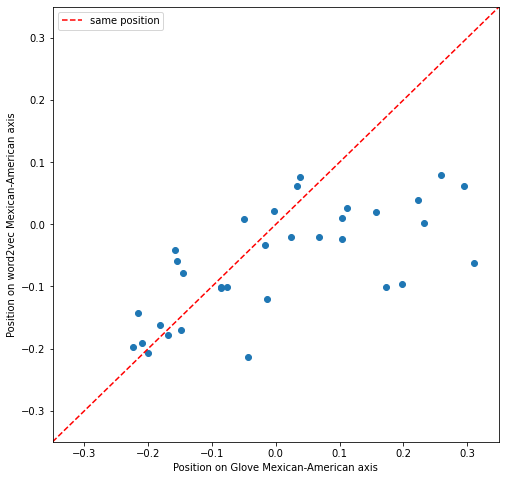

In [7]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(positions_on_axis_glove, positions_on_axis_word2vec)
ax.plot([-0.35,0.35], [-0.35,0.35], linestyle='--', color='red', label='same position')
_ = ax.set_xlim(-0.35, 0.35)
_ = ax.set_ylim(-0.35, 0.35)
_ = ax.set_xlabel('Position on Glove Mexican-American axis')
_ = ax.set_ylabel('Position on word2vec Mexican-American axis')
_ = ax.legend()

plt.savefig('img/similarity_of_positions.jpg')
plt.savefig('img/similarity_of_positions.ps')